In [1]:
import numpy as np 
import pandas as pd 
import holidays

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import sys
sys.path.append(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Önemli Scriptler')

# Read the Data

In [2]:
data = pd.read_csv('train.csv' , parse_dates=['Tarih'] )
submit = pd.read_csv('sample_submission.csv', parse_dates=['Tarih'])
med = pd.read_csv('med.csv' , parse_dates=['Tarih'])


calendar = pd.read_csv('Turkish_calendar.csv',sep=(";"))

# Feature Engineering

In [3]:
from feat_engs import create_time_features2
# data , submit = create_time_features1(data , med , calendar ,submit_df)
data = create_time_features2(data , med)
submit = create_time_features2(submit , med)

data

,Tarih,Dağıtılan Enerji (MWh),Yıl,Ay,Gün,Quarter,day_of_week,day_of_year,hour,week_of_year,...,rolling_outages_24h,exp_avg_outages_24h,hour_sin,hour_cos,is_spring,is_summer,is_autumn,is_winter,is_weekend,is_weekday
0,2018-01-01 00:00:00,1593.944216,2018,1,1,1,0,1,0,1,...,0.0,0.000000e+00,0.000000,1.000000,0,0,0,1,0,-1
1,2018-01-01 01:00:00,1513.933887,2018,1,1,1,0,1,1,1,...,0.0,0.000000e+00,0.258819,0.965926,0,0,0,1,0,-1
2,2018-01-01 02:00:00,1402.612637,2018,1,1,1,0,1,2,1,...,0.0,0.000000e+00,0.500000,0.866025,0,0,0,1,0,-1
3,2018-01-01 03:00:00,1278.527266,2018,1,1,1,0,1,3,1,...,0.0,0.000000e+00,0.707107,0.707107,0,0,0,1,0,-1
4,2018-01-01 04:00:00,1220.697701,2018,1,1,1,0,1,4,1,...,0.0,0.000000e+00,0.866025,0.500000,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40147,2022-07-31 19:00:00,2492.489498,2022,7,31,3,6,212,19,30,...,0.0,1.866555e-256,-0.965926,0.258819,0,1,0,0,1,-2
40148,2022-07-31 20:00:00,2479.958245,2022,7,31,3,6,212,20,30,...,0.0,1.679900e-256,-0.866025,0.500000,0,1,0,0,1,-2
40149,2022-07-31 21:00:00,2485.016884,2022,7,31,3,6,212,21,30,...,0.0,1.511910e-256,-0.707107,0.707107,0,1,0,0,1,-2
40150,2022-07-31 22:00:00,2396.574255,2022,7,31,3,6,212,22,30,...,0.0,1.360719e-256,-0.500000,0.866025,0,1,0,0,1,-2


# Describe the Data

<Axes: >

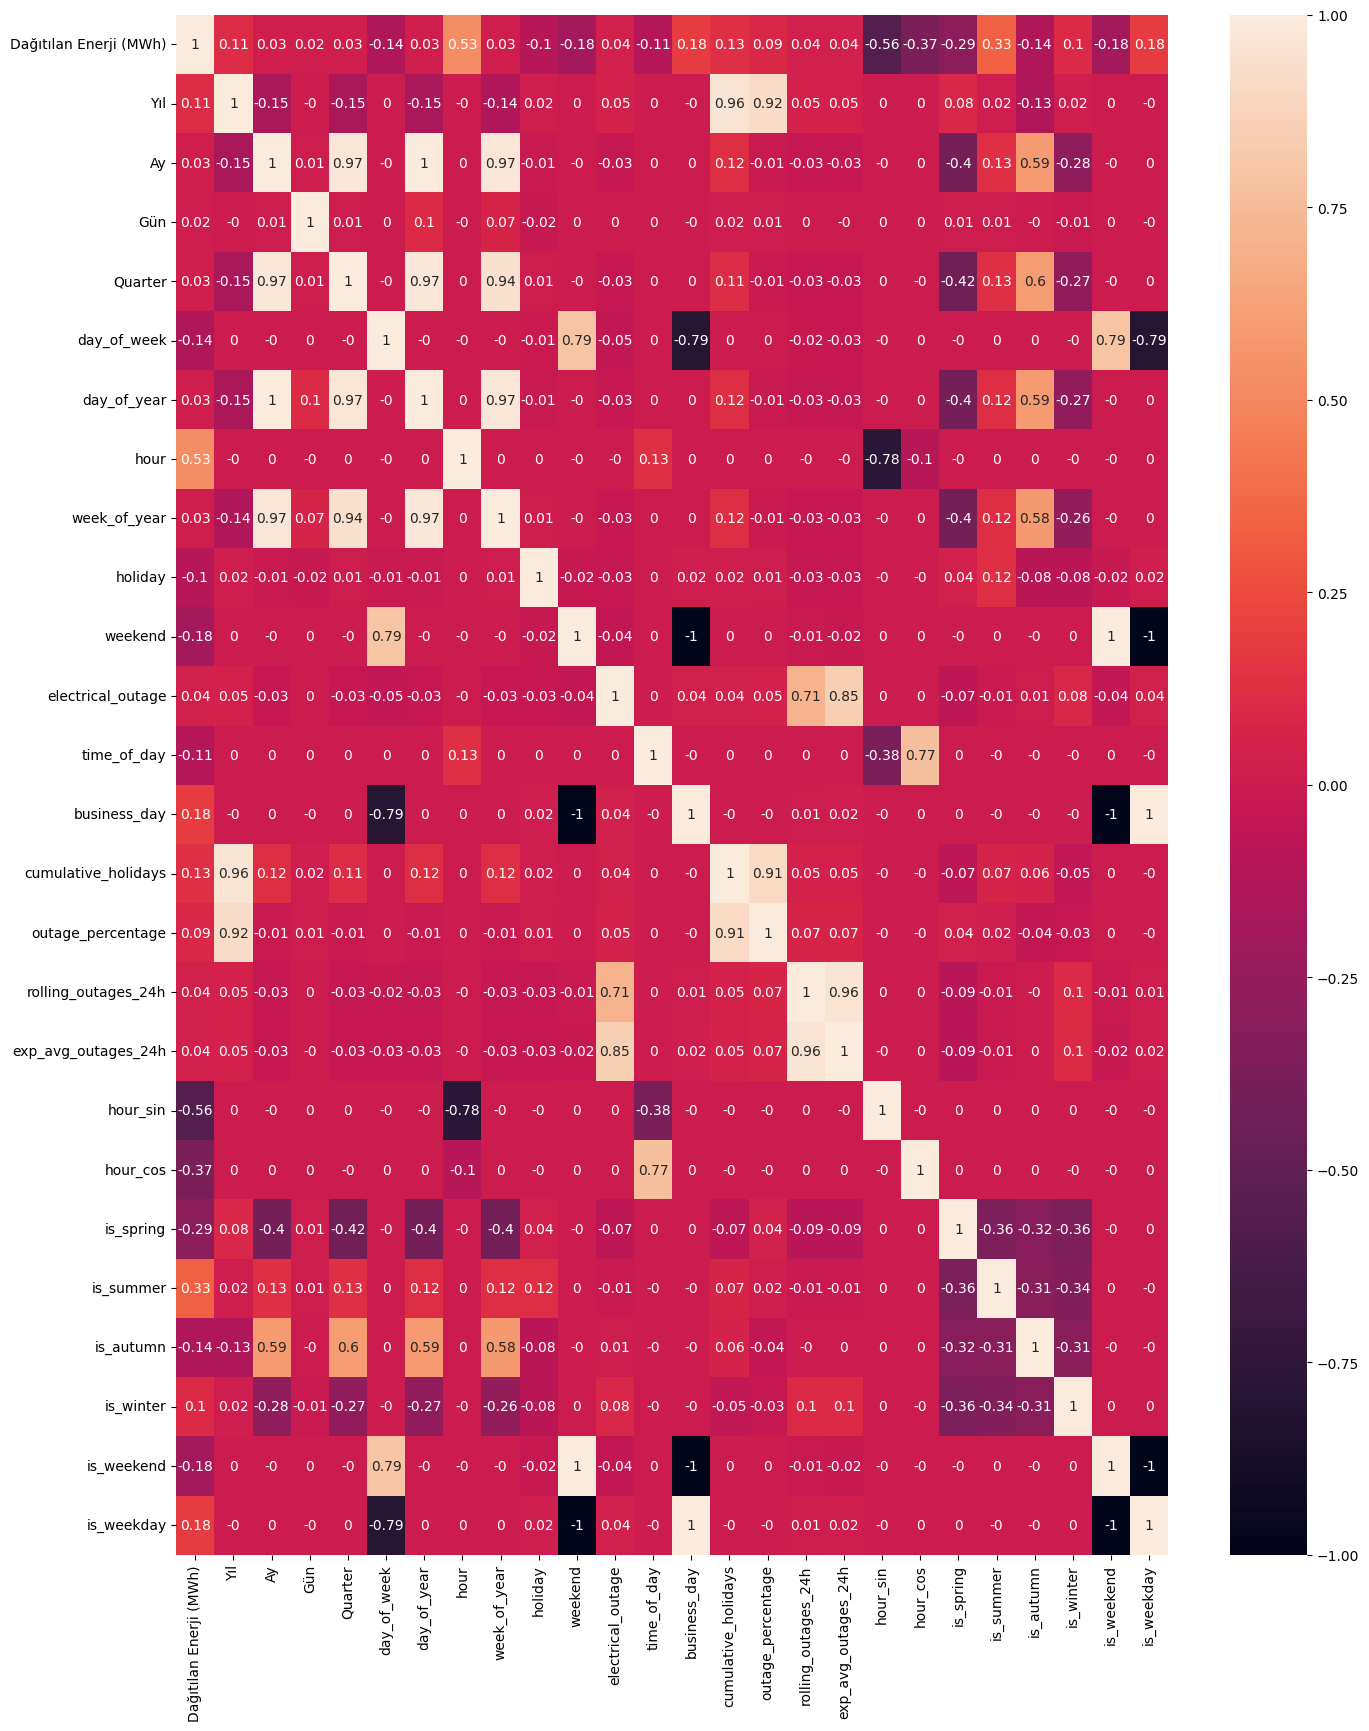

In [4]:
plt.figure(figsize = (16,20) , dpi=100)
sns.heatmap(data.corr(numeric_only=True).round(2) , annot = True)

<Axes: >

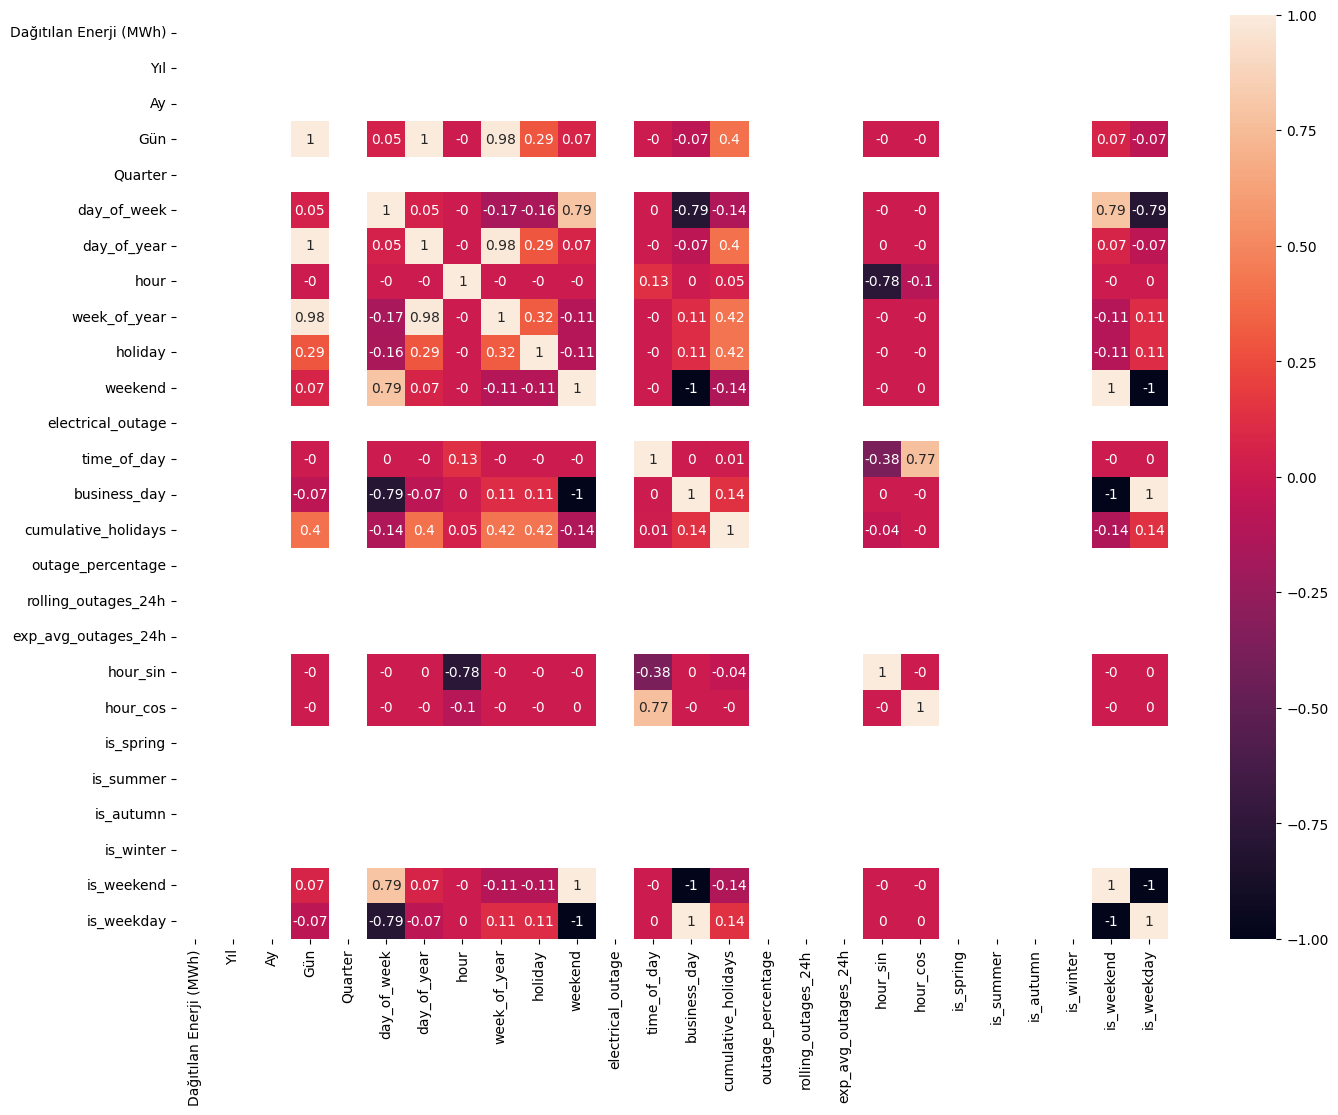

In [5]:
plt.figure(figsize = (16,12) , dpi=100)
sns.heatmap(submit.corr(numeric_only=True).round(2) , annot = True)

In [6]:
# data.drop(['electrical_outage' , 'outage_percentage' , 'rolling_outages_24h' , 'exp_avg_outages_24h'] , axis = 1 , inplace=True)
# submit.drop(['electrical_outage' , 'outage_percentage' , 'rolling_outages_24h' , 'exp_avg_outages_24h'] , axis = 1 , inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tarih                   40152 non-null  datetime64[ns]
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64       
 2   Yıl                     40152 non-null  int64         
 3   Ay                      40152 non-null  int64         
 4   Gün                     40152 non-null  int64         
 5   Quarter                 40152 non-null  int64         
 6   day_of_week             40152 non-null  int64         
 7   day_of_year             40152 non-null  int64         
 8   hour                    40152 non-null  int64         
 9   week_of_year            40152 non-null  UInt32        
 10  holiday                 40152 non-null  int32         
 11  weekend                 40152 non-null  int64         
 12  electrical_outage       40152 non-null  int64 

# Plot the Data

# Feature Engineering

In [8]:
# from feat_engs import create_datetimes, create_businessDay_cumulativeholidays ,create_electricOutage_timeofDay , create_holiday_weekend , create_hourly_sin_cos , create_outage_rolling_percentages , create_seasons

# all_data = [data, future_data]
# for df in all_data :
#     create_datetimes(df)
#     create_holiday_weekend(df)
#     create_businessDay_cumulativeholidays(df)
#     create_electricOutage_timeofDay(df , med)
#     create_hourly_sin_cos(df)
#     create_outage_rolling_percentages(df)
#     # create_seasons(df)
#     df.set_index('Tarih' , inplace=True)
#     df.drop('date' , axis = 1 ,inplace=True)

In [9]:
# from feat_engs import create_time_features1 , create_time_features2

# # data , submit = create_time_features1(data , med , calendar ,submit_df)
# data = create_time_features2(data , med)
# submit = create_time_features2(submit , med)

# data

In [10]:
# data['rolling_outages_24h'].value_counts()

# Train | Test Split

In [11]:
# # Tüm feature'ları içeren data değişkeni
# X_all_temp = data[['Dağıtılan Enerji (MWh)', 'feature_1', 'feature_2', ...]]

# # Target label olarak 'Dağıtılan Enerji (MWh)' feature'ını kullanın
# y_all_temp = data['Dağıtılan Enerji (MWh)']

In [12]:
# X_all_temp = data.copy()
# X_test_temp = data.loc[data.index > '2022-02-23 23:00:00'].copy()
# X_train_temp = data.loc[data.index <= '2022-02-23 23:00:00'].copy()

In [13]:
# print(f"X_data Shape : {X_all_temp.shape}")
# print(f"X_train Shape : {X_train_temp.shape}")
# print(f"X_test Shape : {X_test_temp.shape}")

In [14]:
data.set_index('Tarih' , inplace=True)
submit.set_index('Tarih' , inplace=True)

data['week_of_year'] = data['week_of_year'].astype('int')

In [15]:
X=data.drop("Dağıtılan Enerji (MWh)", axis=1)
y=data["Dağıtılan Enerji (MWh)"]
# forecast=submit.drop("Dağıtılan Enerji (MWh)", axis=1)
forecast = submit.copy().drop('Dağıtılan Enerji (MWh)' , axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

train_df , test_df = train_test_split(data, test_size=0.15 , shuffle=False)

# Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df) , columns=train_df.columns)
test_df_scaled = pd.DataFrame(scaler.transform(test_df) , columns=test_df.columns)

In [18]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# X_scaled = scaler.fit_transform(X)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_forecast_scaled = scaler.transform(forecast)

In [19]:
X.shape

(40152, 25)

In [20]:
# train[cfg.target] = np.log1p(train[cfg.target])

# Reshape and Packages

In [21]:
train_df_scaled

,Dağıtılan Enerji (MWh),Yıl,Ay,Gün,Quarter,day_of_week,day_of_year,hour,week_of_year,holiday,...,rolling_outages_24h,exp_avg_outages_24h,hour_sin,hour_cos,is_spring,is_summer,is_autumn,is_winter,is_weekend,is_weekday
0,0.261955,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000e+00,0.500000,1.000000,0.0,0.0,0.0,1.0,0.0,1.0
1,0.232996,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,1.0,...,0.0,0.000000e+00,0.629410,0.982963,0.0,0.0,0.0,1.0,0.0,1.0
2,0.192705,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.086957,0.000000,1.0,...,0.0,0.000000e+00,0.750000,0.933013,0.0,0.0,0.0,1.0,0.0,1.0
3,0.147794,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.130435,0.000000,1.0,...,0.0,0.000000e+00,0.853553,0.853553,0.0,0.0,0.0,1.0,0.0,1.0
4,0.126864,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.173913,0.000000,1.0,...,0.0,0.000000e+00,0.933013,0.750000,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34124,0.486424,1.0,0.909091,0.700000,1.0,0.000000,0.890411,0.869565,0.884615,0.0,...,0.0,2.361171e-42,0.066987,0.750000,0.0,0.0,1.0,0.0,0.0,1.0
34125,0.447251,1.0,0.909091,0.700000,1.0,0.000000,0.890411,0.913043,0.884615,0.0,...,0.0,2.125054e-42,0.146447,0.853553,0.0,0.0,1.0,0.0,0.0,1.0
34126,0.400833,1.0,0.909091,0.700000,1.0,0.000000,0.890411,0.956522,0.884615,0.0,...,0.0,1.912548e-42,0.250000,0.933013,0.0,0.0,1.0,0.0,0.0,1.0
34127,0.347889,1.0,0.909091,0.700000,1.0,0.000000,0.890411,1.000000,0.884615,0.0,...,0.0,1.721294e-42,0.370590,0.982963,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
train_df_scaled.columns

Index(['Dağıtılan Enerji (MWh)', 'Yıl', 'Ay', 'Gün', 'Quarter', 'day_of_week',
       'day_of_year', 'hour', 'week_of_year', 'holiday', 'weekend',
       'electrical_outage', 'time_of_day', 'business_day',
       'cumulative_holidays', 'outage_percentage', 'rolling_outages_24h',
       'exp_avg_outages_24h', 'hour_sin', 'hour_cos', 'is_spring', 'is_summer',
       'is_autumn', 'is_winter', 'is_weekend', 'is_weekday'],
      dtype='object')

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df_scaled, val_df=test_df_scaled, test_df=test_df_scaled,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
wd = WindowGenerator(24 , 1 , 1 , label_columns=["Dağıtılan Enerji (MWh)"] )

In [ ]:
print(wd)

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:wd.total_window_size]),
                           np.array(train_df[100:100+wd.total_window_size]),
                           np.array(train_df[200:200+wd.total_window_size])])

example_inputs, example_labels = wd.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

In [ ]:
wd.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='Dağıtılan Enerji (MWh)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
wd.plot()

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.test_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
wd.train.element_spec

In [ ]:
for example_inputs, example_labels in wd.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Critical Point

In [ ]:
# Overlapsiz
# 24 Time_stepse bakıp gelecekte sadece 1 time_step tahmin etme.

time_steps = 24

X_3d = []
for i in range(0, len(X_scaled) - time_steps, time_steps):
    X_3d.append(X_scaled[i:i+time_steps])

X_3d = np.array(X_3d)


y_2d = []
for i in range(time_steps, len(y), time_steps):
    y_2d.append(y[i])
    
y_2d = np.array(y_2d)


X_train_3d = []
for i in range(0, len(X_train_scaled) - time_steps, time_steps):
    X_train_3d.append(X_train_scaled[i:i+time_steps])

X_train_3d = np.array(X_train_3d)


y_train_2d = []
for i in range(time_steps, len(y_train), time_steps):
    y_train_2d.append(y_train[i])
    
y_train_2d = np.array(y_train_2d)


X_test_3d = []
for i in range(0, len(X_test_scaled) - time_steps, time_steps):
    X_test_3d.append(X_test_scaled[i:i+time_steps])

X_test_3d = np.array(X_test_3d)


y_test_2d = []
for i in range(time_steps, len(y_test), time_steps):
    y_test_2d.append(y_test[i])
    
y_test_2d = np.array(y_test_2d)


X_forecast_3d = []
for i in range(0, len(X_forecast_scaled) - time_steps, time_steps):
    X_forecast_3d.append(X_forecast_scaled[i:i+time_steps])
    
X_forecast_3d = np.array(X_forecast_3d)

In [ ]:
# # Target label + Multi features and NO---ovlap

# def packager(X_data_scaled, future_data_scaled ,X_train_scaled, X_test_scaled, window_size=24):
#     X_data, y_data, X_future , y_future ,X_train, y_train, X_test, y_test = [], [], [], [], [], [] , [], []

#     for i in range(0, len(X_data_scaled)-window_size, window_size):
#         X_data.append(X_data_scaled[i:i+window_size, :])
#         y_data.append(X_data_scaled[i+window_size, 0])
        
#     for i in range(0, len(future_data_scaled)-window_size, window_size):
#         X_future.append(future_data_scaled[i:i+window_size, :])
#         y_future.append(future_data_scaled[i+window_size, 0])

#     for i in range(0, len(X_train_scaled)-window_size, window_size):
#         X_train.append(X_train_scaled[i:i+window_size, :])
#         y_train.append(X_train_scaled[i+window_size, 0])

#     for i in range(0, len(X_test_scaled)-window_size, window_size):
#         X_test.append(X_test_scaled[i:i+window_size, :])
#         y_test.append(X_test_scaled[i+window_size, 0])

#     X_data, y_data = np.array(X_data), np.array(y_data)
#     X_future, y_future = np.array(X_future), np.array(y_future)
#     X_train, y_train = np.array(X_train), np.array(y_train)
#     X_test, y_test = np.array(X_test), np.array(y_test)

#     return X_data, y_data, X_future, y_future, X_train, y_train, X_test, y_test

In [ ]:
# X_data , y_data , X_future , y_future , X_train, y_train, X_test, y_test = packager(X_data_scaled , future_data_scaled, X_train_scaled, X_test_scaled, 24)

In [ ]:
# print(f"X_3d Shape : {X_3d.shape}")
# print(f"y_2d Shape : {y_2d.shape}\n\n")
# print(f"X_train_3d Shape : {X_train_3d.shape}")
# print(f"y_train_2d Shape : {y_train_2d.shape}\n\n")
# print(f"X_test_3d Shape : {X_test_3d.shape}")
# print(f"y_test_2d Shape : {y_test_2d.shape}\n\n")
# print(f"X_forecast_3d Shape : {X_forecast_3d.shape}")
# # print(f"y_future Shape : {y_future.shape}")

# Model Time

# Final Model

In [ ]:
import tensorflow as tf

# Seed ayarlamak
seed_value = 61
tf.keras.utils.set_random_seed(seed_value)

## Manual Modelling

In [ ]:
# print(f"""
#       Model eğitiminde kullandığımız dataların shapeleri
#       X_3d Shape : {X_3d.shape}
#       y_2d Shape : {y_2d.shape}
#       X_test_3d Shape : {X_test_3d.shape}
#       y_test_2d Shape : {y_test_2d.shape}
#       """)

In [ ]:
# for x,y in (wd.train):
#     print(x , y)

In [ ]:
# wd.train[-1]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense , BatchNormalization , Dropout , GlobalAveragePooling1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
from keras.optimizers import Adam , Adagrad , Adadelta , Nadam , RMSprop
from keras.losses import MeanAbsolutePercentageError
import tensorflow_addons as tfa


# Model oluşturma
model = Sequential()
model.add(LSTM(32, activation='tanh' , input_shape = (24 , 26) ,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh' ,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh' ,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(LSTM(1, activation='tanh' ,return_sequences=True))
# model.add(BatchNormalization())
# model.add(LSTM(32, activation='tanh' ,return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Dense(32, activation='relu'))
model.add(GlobalAveragePooling1D())
# model.add(LSTM(12, activation='tanh' ,return_sequences=False))
# model.add(LSTM(4, activation='tanh'  , return_sequences=False))
model.add(Dense(1))
model.add(tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,-1)))

opt = Adam(learning_rate = 5e-4)
opt = tfa.optimizers.Lookahead(opt)
model.compile(loss= MeanAbsolutePercentageError(), optimizer=opt)

model.summary()

# # reduce_lr = ReduceLROnPlateau(factor = 0.1 , patience=8)
# # early_stop = EarlyStopping(monitor='val_loss' , patience=7)
model_check = ModelCheckpoint(filepath=r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\justFeatures_NOovlap\\1-preds\\tf_notebook\\model-{epoch:03d}-{val_loss:.5f}.h5', monitor="val_loss", verbose=1)

# # Modeli eğitme
history = model.fit(wd.train, epochs=20, validation_data=wd.val , callbacks= [model_check])


# # Modeli değerlendirme
# mape_score = model.evaluate(X_test_3d, y_test_2d)
# print('Test MAPE: %.3f' % mape_score)

### Plot the History

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.show()

## Import the Model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Multi_Features_NOovlap\\64-32-pool(lr00001-batch16)\\model-749-5.33494.h5")

# Eval Metric

In [ ]:
from eval_metrics import eval_metrics

y_pred = model.predict(X_test)

eval_metrics(y_test , y_pred)

# Predictions

In [ ]:
print(f"""
      Model eğitiminde kullandığımız dataların shapeleri
      X_data : {X_data.shape}
      y_data : {y_data.shape}
      X_test : {X_test.shape}
      y_test : {y_test.shape}
      """)


print(f"Modelin tahminlerinin alacağı future_data shape'i : {future_data.shape}")

In [ ]:
# Elimizdeki verilerin son 24'ü bir sonraki tahmini yapmak için kullanılacak
last_window = X_data[-1:, :, :]

# 31 gün boyunca gelecek tahminleri yapmak için bir boş tahmin dizisi oluşturun
forecasts = []

for i in range(31*24):
    # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
    last_window_reshaped = last_window.reshape(1, 24, 20)

    # Son pencereyi kullanarak bir tahmin yapın
    forecast = model.predict(last_window_reshaped , verbose=0)[0][0]

    # Tahmini tahmin listesine ekleyin
    forecasts.append(forecast)
    
    # future_data_scaled'ı güncelle
    future_data_scaled[i,0] = forecast

    # Tahmin edilen değeri son pencerenin sonuna ekleyin
    last_window = np.append(last_window[:,1:,:] , np.array([[future_data_scaled[i]]]) , axis = 1)

    
# Tahminleri geri ölçeklendirin
forecast_data = scaler.inverse_transform(np.array(future_data_scaled).reshape(-1, 20))
forecasts = forecast_data[:,0]

forecasts

# Visualize the Predictions

In [ ]:
from eval_metrics import preds_plot

In [ ]:
anomaly_data_vis = data[20900:21500]['Dağıtılan Enerji (MWh)']

In [ ]:
future_data['Dağıtılan Enerji (MWh)'] = forecasts
future_data_vis = future_data['Dağıtılan Enerji (MWh)']

In [ ]:
target_data_vis = data[data.index.month == 8]['Dağıtılan Enerji (MWh)']

In [ ]:
data_vis = data['Dağıtılan Enerji (MWh)']

In [ ]:
print(f'Normal all data mean : {data_vis.mean()}\n')
print(f'Anomaly data mean : {anomaly_data_vis.mean()}\n')
print(f'Target data mean : {target_data_vis.mean()}\n')
print(f'Future data mean : {future_data_vis.mean()}\n')

In [ ]:
plt.figure(figsize=(16,12) , dpi = 100)
preds_plot(data_vis , future_data_vis , target_data_vis , anomaly_data_vis)

In [ ]:
# Done

In [ ]:

def get_forecasts(model , last_window = X_data[-1:, :, :]):
    # Elimizdeki verilerin son 24'ü bir sonraki tahmini yapmak için kullanılacak
    # last_window = X_data[-1:, :, :]

    # 31 gün boyunca gelecek tahminleri yapmak için bir boş tahmin dizisi oluşturun
    forecasts = []

    for i in range(31*24):
        # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
        last_window_reshaped = last_window.reshape(1, 24, 20)

        # Son pencereyi kullanarak bir tahmin yapın
        forecast = model.predict(last_window_reshaped , verbose=0)[0][0]

        # Tahmini tahmin listesine ekleyin
        forecasts.append(forecast)
        
        # future_data_scaled'ı güncelle
        future_data_scaled[i,0] = forecast

        # Tahmin edilen değeri son pencerenin sonuna ekleyin
        last_window = np.append(last_window[:,1:,:] , np.array([[future_data_scaled[i]]]) , axis = 1)

        
    # Tahminleri geri ölçeklendirin
    forecast_data = scaler.inverse_transform(np.array(future_data_scaled).reshape(-1, 20))
    forecasts = forecast_data[:,0]
    
    return forecasts

def compare_rmse(y_true , y_forecast):
    # Root Mean Square Error (RMSE)
    rmse = np.sqrt(np.mean((np.array(y_true) - np.array(y_forecast))**2))
    return rmse

def compare_mae(y_true , y_forecast):
    mae = np.mean(np.abs(np.array(y_true) - np.array(y_forecast)))
    return mae
    
def compare_corr(y_true , y_forecast):
    from scipy.stats import pearsonr
    corr, _ = pearsonr(y_true, y_forecast)
    return corr

def compare_cosine_similarity(y_true, y_pred):
    """
    Calculates the cosine similarity between two lists.
    """
    dot_product = np.dot(y_true, y_pred)
    norm_list1 = np.linalg.norm(y_true)
    norm_list2 = np.linalg.norm(y_pred)
    return dot_product / (norm_list1 * norm_list2)
    
def jaccard_similarity(y_true, list2):
    """
    Calculates the Jaccard similarity between two lists.
    """
    set1 = set(y_true)
    set2 = set(list2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)